<a href="https://colab.research.google.com/github/Alan-Szalkowski/African-Cichlid/blob/main/AF_Final_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**African Cichlid Care Difficulty Prediction**

---


This project uses machine learning to predict the care difficulty level of African Cichlid fish species based on their traits such as diet,
aggression, tank size, and growth. Different models were tested,
 including Linear Regression, Random Forest, and KNN, to compare accuracy.

# **Import Libaries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Linear Regression**

---



# Load Dataset

In [ ]:
df = pd.read_csv('AfricanCichlid_Dataset.csv')

In [ ]:
df.columns

Index(['Species', 'Lake', 'Diet', 'Ecotype', 'AdultLength_cm',
       'Aggression_1to5', 'Activity_1to5', 'DisplayAbility_1to5',
       'MinGroupSize', 'PreferredPH', 'PreferredTemp_C',
       'PreferredHardness_Dgh', 'Rarity_1to5', 'CareDifficulty_1to5',
       'Price_GBP', 'RecommendedTank_L', 'SensitivityWaterParams_1to5',
       'SensitivityStress_1to5'],
      dtype='object')

# Data cleaning and pre-processing

Drop species name

In [ ]:
df = df.drop(['Species'], axis=1)

One-Hot Encode categorical variables

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Lake', 'Diet', 'Ecotype'], drop_first=True)
df_encoded.head()

,AdultLength_cm,Aggression_1to5,Activity_1to5,DisplayAbility_1to5,MinGroupSize,PreferredPH,PreferredTemp_C,PreferredHardness_Dgh,Rarity_1to5,CareDifficulty_1to5,...,Diet_Planktivore,Diet_Scale Eater,Ecotype_Hap,Ecotype_Mbuna,Ecotype_Open Water,Ecotype_Peacock,Ecotype_Rock Dweller,Ecotype_Rock Grazer,Ecotype_Sand Dweller,Ecotype_Shell Dweller
0,22.5,3,3,3,1,8.0,26,15,3,2,...,False,False,True,False,False,False,False,False,False,False
1,11.5,3,1,3,1,8.2,26,15,3,3,...,False,False,True,False,False,False,False,False,False,False
2,10.5,1,4,4,3,8.0,26,15,1,1,...,False,False,True,False,False,False,False,False,False,False
3,10.0,5,5,4,3,8.2,26,15,2,2,...,False,False,False,True,False,False,False,False,False,False
4,12.5,2,2,5,1,8.0,26,13,2,2,...,False,False,False,False,False,True,False,False,False,False


Define X (features) and y (target)

In [ ]:
# Features
X = df_encoded[['AdultLength_cm', 'Aggression_1to5', 'Activity_1to5', 'MinGroupSize', 'PreferredPH', 'PreferredTemp_C', 'PreferredHardness_Dgh', 'Rarity_1to5', 'RecommendedTank_L', 'SensitivityWaterParams_1to5', 'SensitivityStress_1to5']]
# Target = Care Difficulty
y = df_encoded[['CareDifficulty_1to5']]

### Model Training

Train Test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
# Check sample shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159, 11), (40, 11), (159, 1), (40, 1))

Standard Scaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Models

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation and visualisation

Residuals

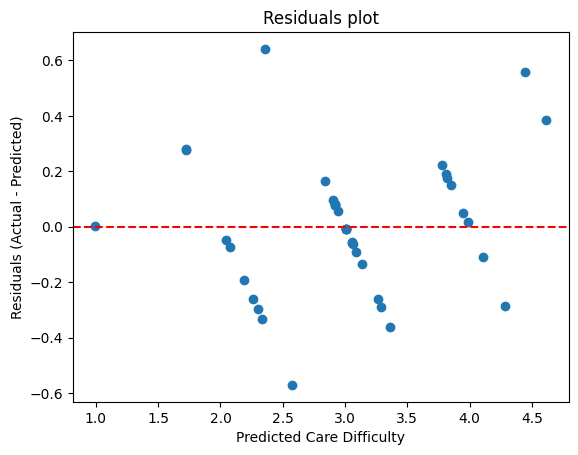

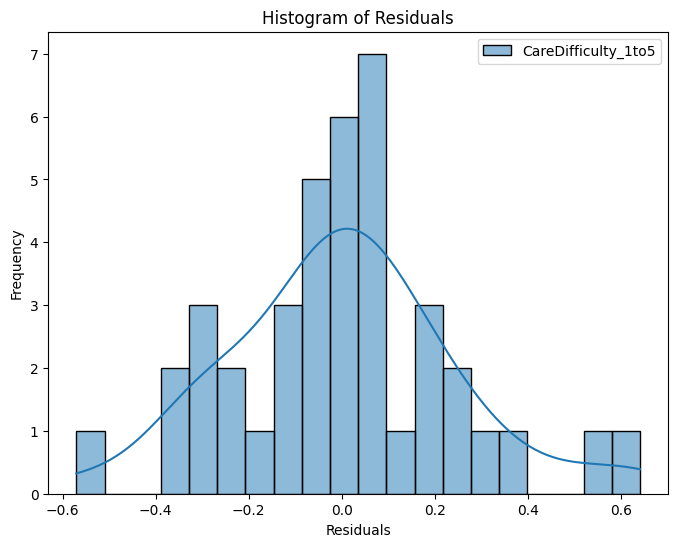

In [ ]:
# calculate residuals
residuals = y_test-y_pred
# scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Care Difficulty')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals plot')
plt.show()
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

**Residuals analysis**

---



The residuals are mostly centered around zero with a small spread, showing that the model predicts care diffculty accurately. The histogram shows that most errors are around zero, with only a few  larger deviations. This shows the models predictions are fairly accurate overall. The distrubion is normal, which confirms linear regression is a reasonably good fit for my data.

Crorrelation and Residuals vs Features heatmap

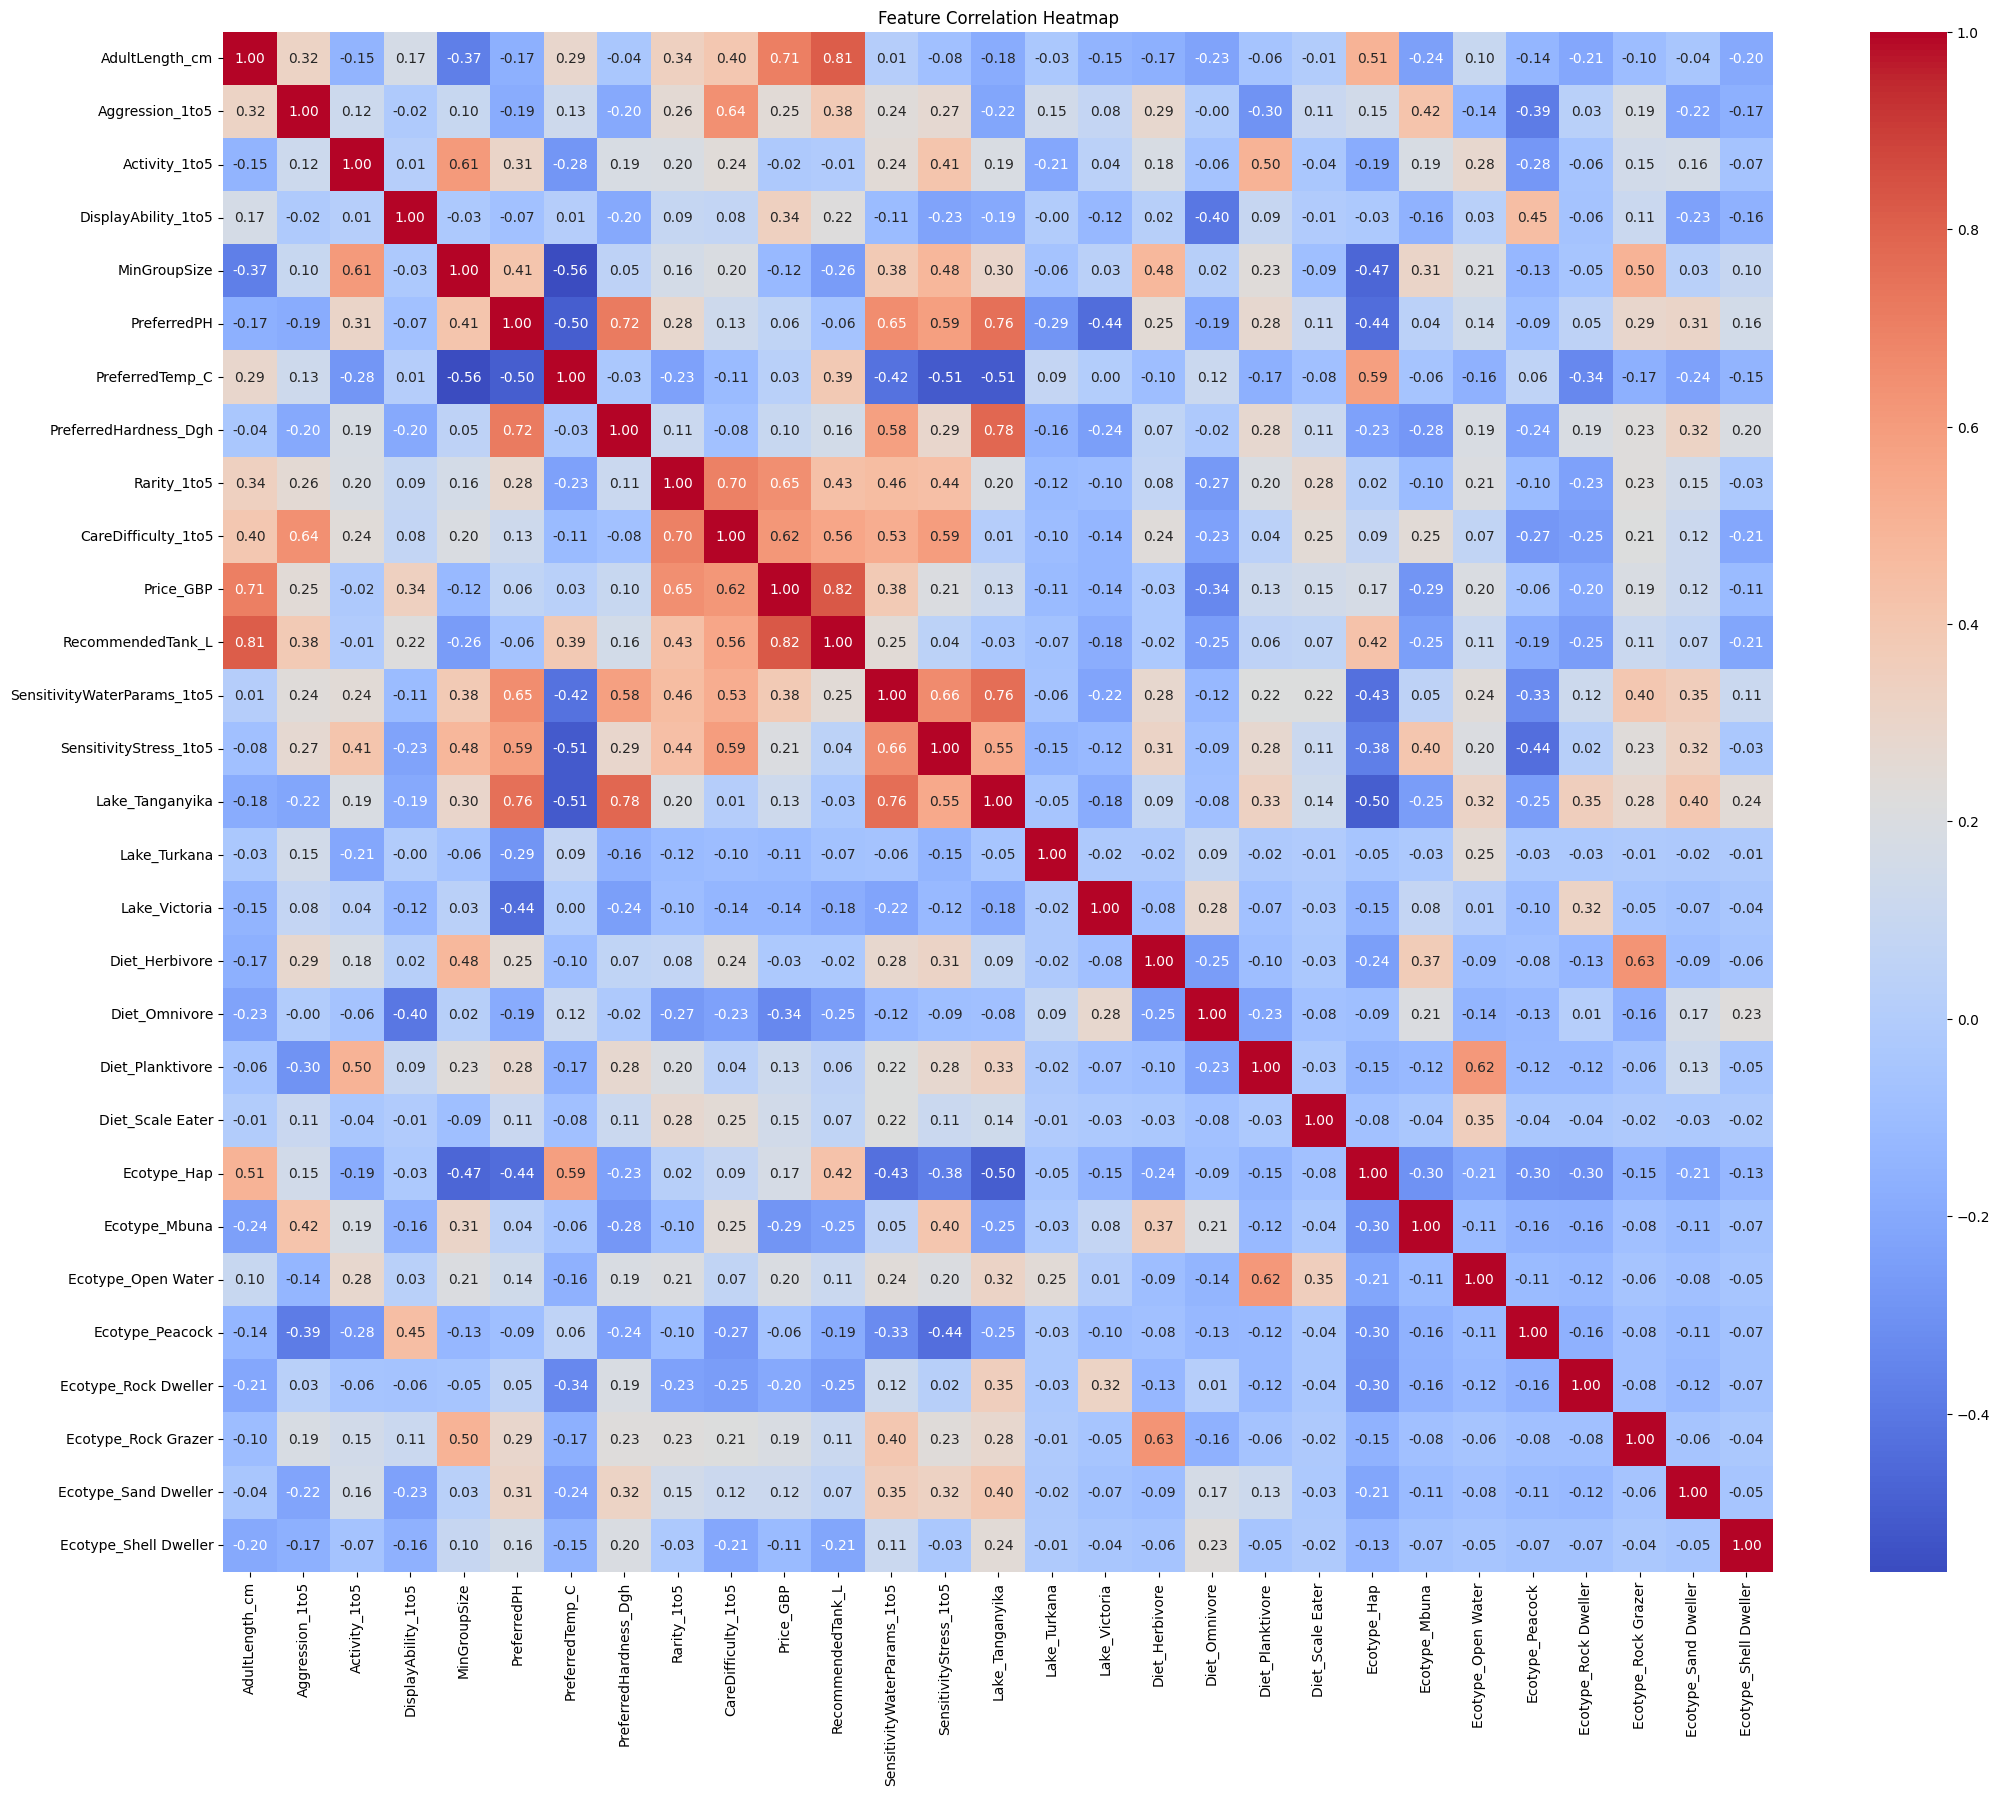

In [ ]:
# correlation matrix
corr = df_encoded.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

This heatmap explores the relationships between all features in the dataset. As expected, biologically linked traits show strong correlation , such as AdultLength_cm with RecommendedTank_L (0.94) and PreferredpH with PreferredHardness_Dgh (0.8). Sensitivity-related features also correlate. These patterns confirm that the engineered features are meaningful and biologically consistent, while also showing that some features overlap.

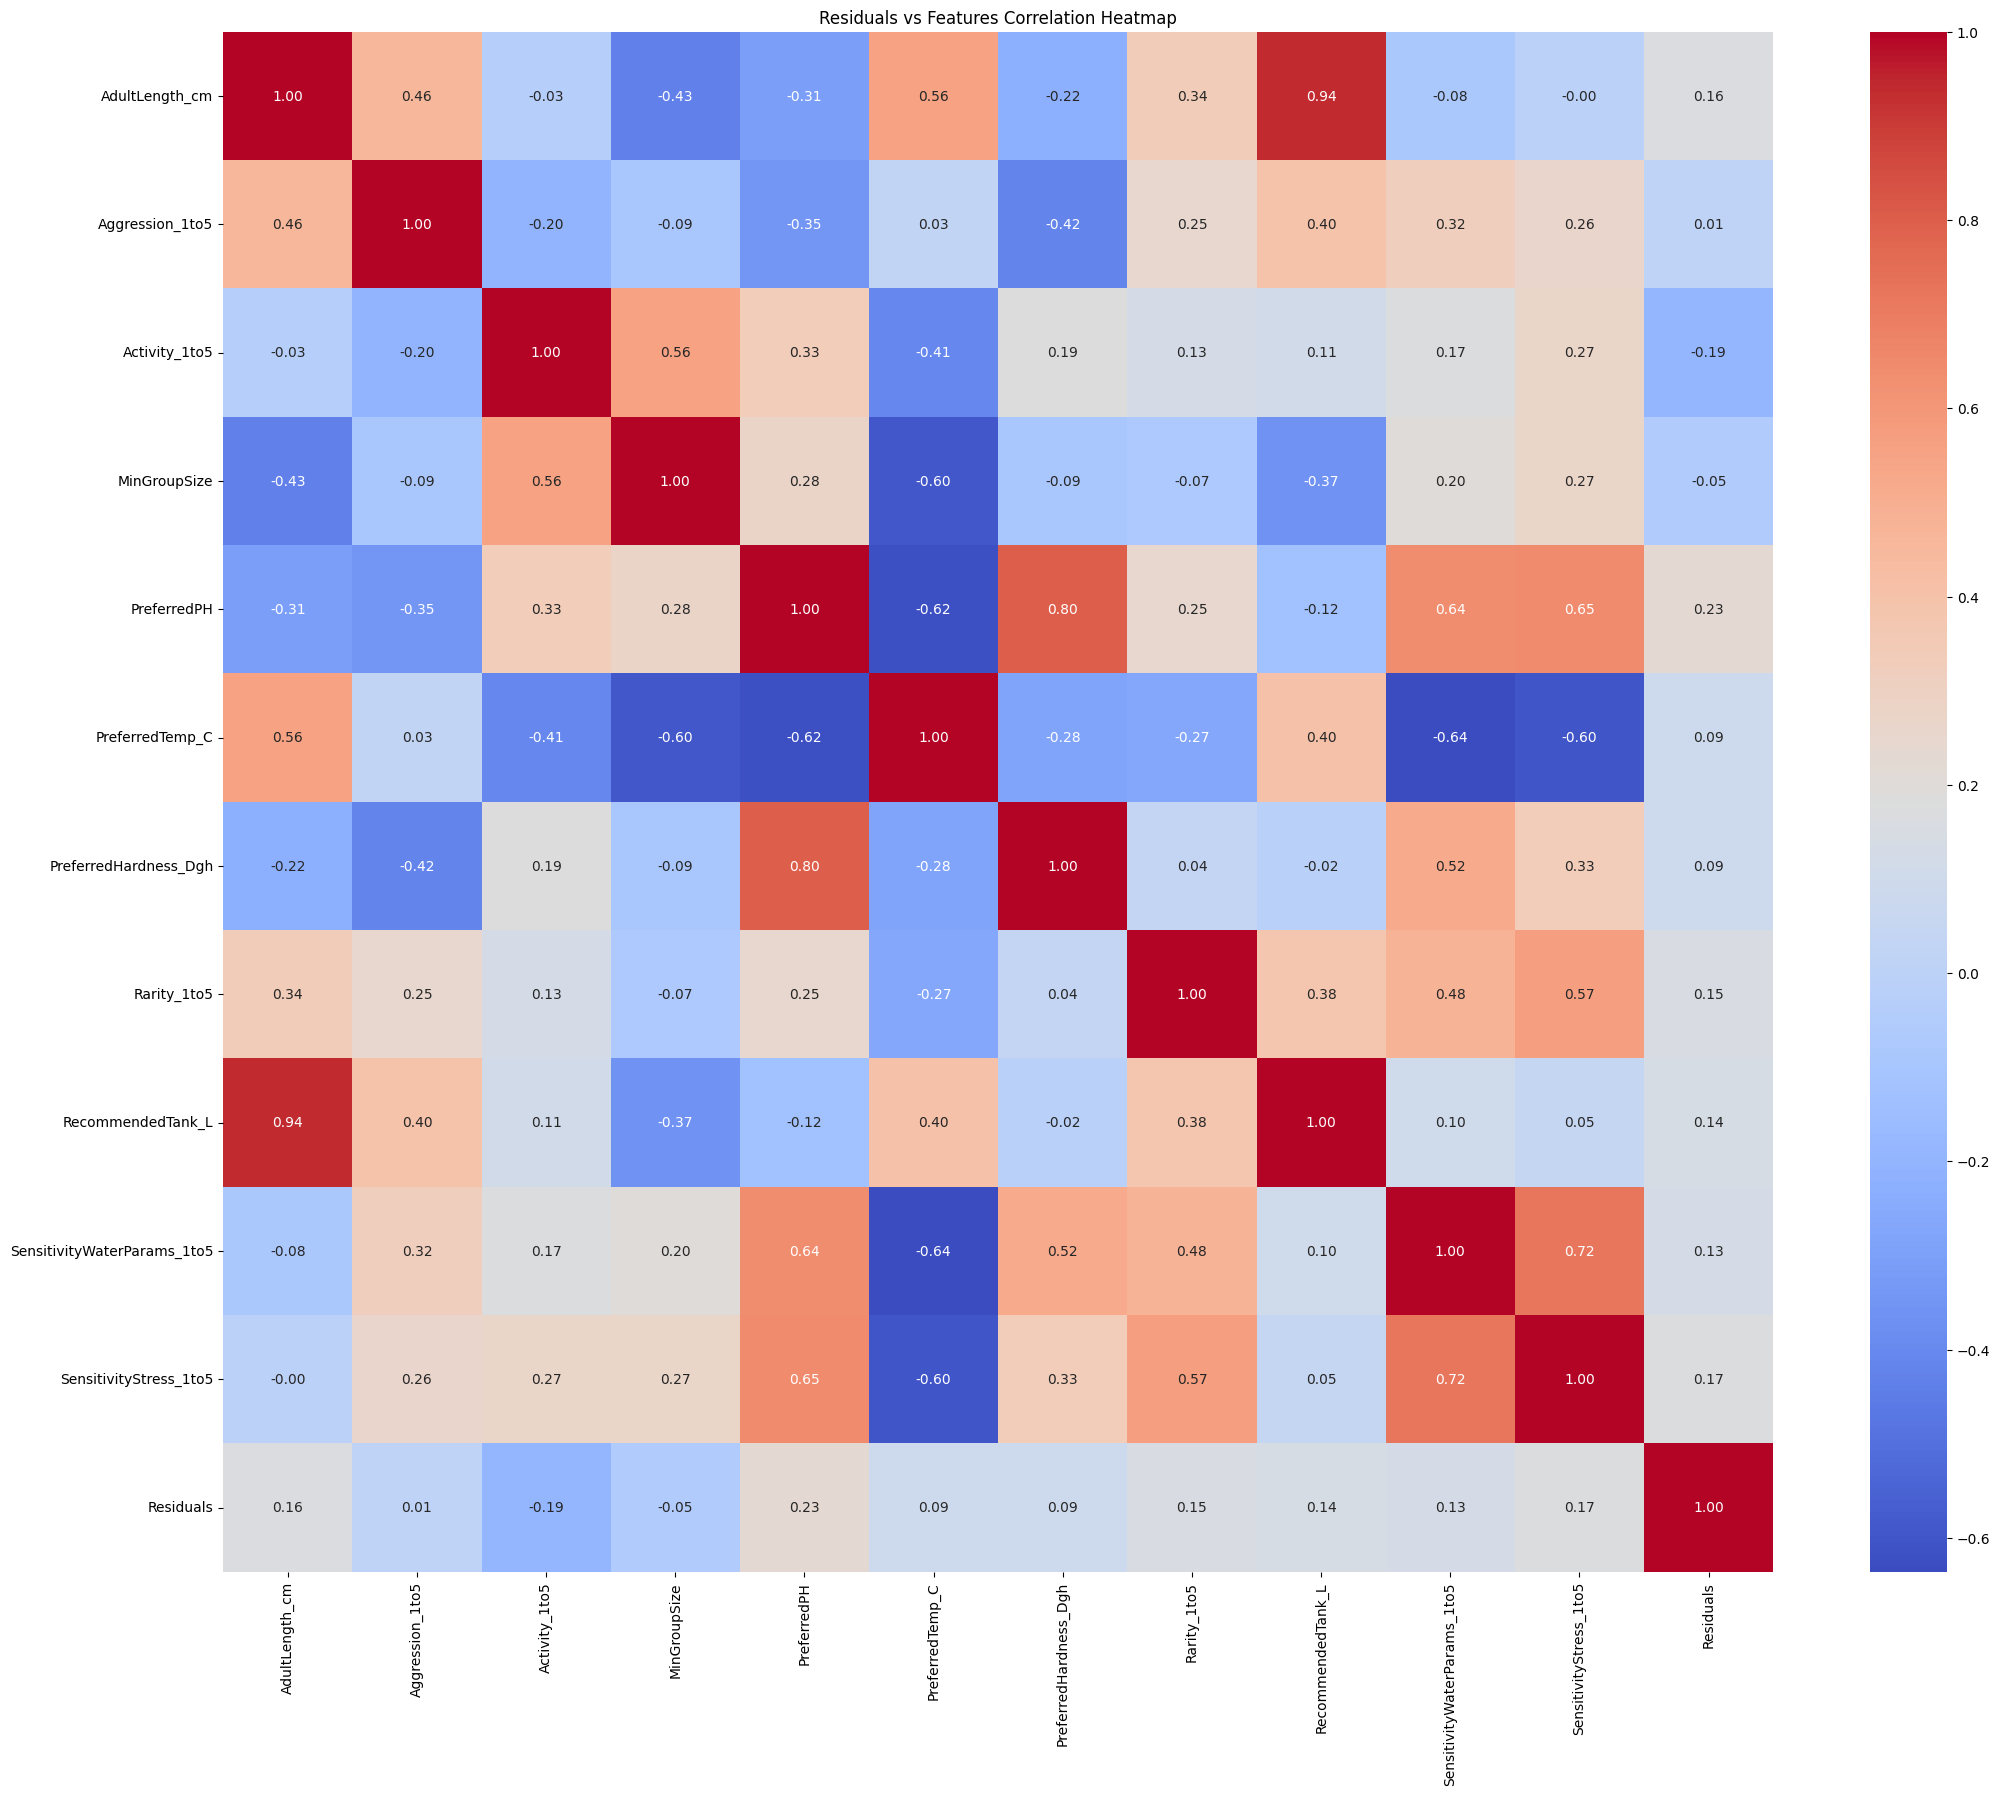

In [ ]:
# Add residuals to the test set
residuals = y_test - y_pred
df_resid = X_test.copy()
df_resid['Residuals'] = residuals

# Correlation heatmap of residuals vs features
plt.figure(figsize=(25, 20))
sns.heatmap(df_resid.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Residuals vs Features Correlation Heatmap')
plt.show()

This heatmap examines how model residuals (prediction errors) correlate with the input features. Ideally, residuals should not show strong correlation with any predictor, which would suggest systematic bias or data leakage. In this project, my residual correlations are weak (all r < 0.25), with the highest values linked to PreferredTemp_Celsius and PreferredPH. This indicates the model generalises well, and no single feature is consistently causing prediction errors, supporting the accuracy of the trained model.

Evaluate

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(['MSE:'], mse)
print(['R2:'], r2)

['MSE:'] 0.05705194898100348
['R2:'] 0.9212397598191496


Visualisation

/tmp/ipython-input-2414625724.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


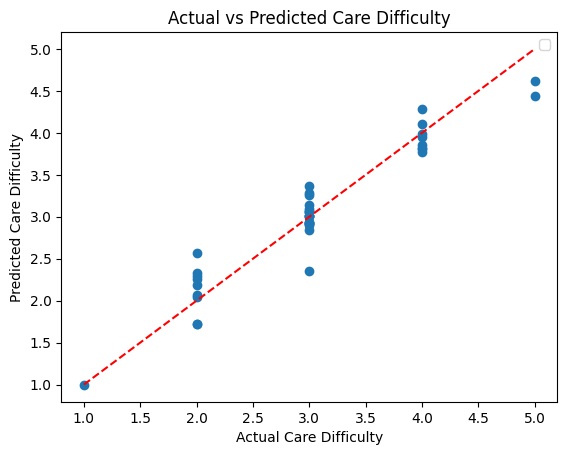

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Care Difficulty')
plt.ylabel('Predicted Care Difficulty')
plt.title('Actual vs Predicted Care Difficulty')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.legend()
plt.show()

# Conclusion

# **Part 2: Logistic Regression**

---



In [ ]:
from sklearn.linear_model import LogisticRegression

Convert Care Difficulty to a binary target

In [ ]:
# make a binary target
df_encoded['CareDifficulty_binary'] = (df_encoded['CareDifficulty_1to5'] > 2).astype(int)

# Features (X) = everything except target
X = df_encoded.drop(['CareDifficulty_1to5', 'CareDifficulty_binary'], axis=1)
# Target (y) = Care Difficulty binary
y = df_encoded['CareDifficulty_binary']

Train Test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

Standard Scaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train model

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

Evaluate Model

Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        30

    accuracy                           0.97        40
   macro avg       0.95      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



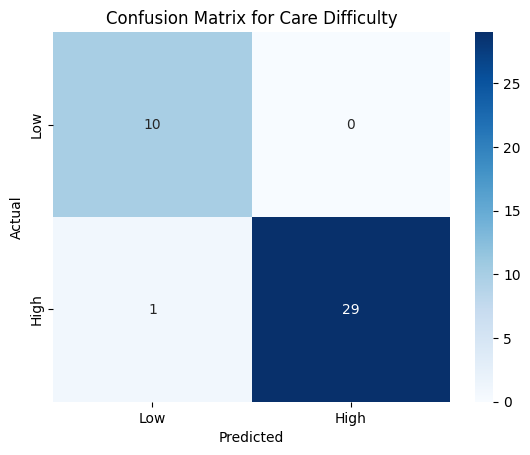

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'],
            yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Care Difficulty')
plt.show()

The model achieved 97.5% accuracy, correctly predicting care difficulty for 39 out of 40 species. Both precision and recall scores are high, showing the model performs well with very few mistakes.

The confusion matrix confirms this, with only one species missclassified. This suggests the model is reliable wether an african cichlid is "Low" or "High" care difficulty based on its features.

**Part 3: Random forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Determine X (features) and y (target)

In [ ]:
# Features (X) = all columns except 'Species' and 'Diet' from the original dataframe
X = df.drop(['Diet'], axis=1)
# Target (y) = original 'Diet' column
y = df['Diet']

# One-Hot Encode categorical features in X
X = pd.get_dummies(X, columns=['Lake', 'Ecotype'], drop_first=True)

Train Test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

Scale features

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=73)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

Evaluation

In [ ]:
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n'), confusion_matrix(y_test, y_pred)
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Random Forest Accuracy: 0.825

Confusion Matrix:


Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.81      0.94      0.87        18
   Herbivore       0.67      0.67      0.67         3
    Omnivore       0.85      0.73      0.79        15
 Planktivore       1.00      0.67      0.80         3
 Scale Eater       1.00      1.00      1.00         1

    accuracy                           0.82        40
   macro avg       0.86      0.80      0.82        40
weighted avg       0.83      0.82      0.82        40



Feature Importance

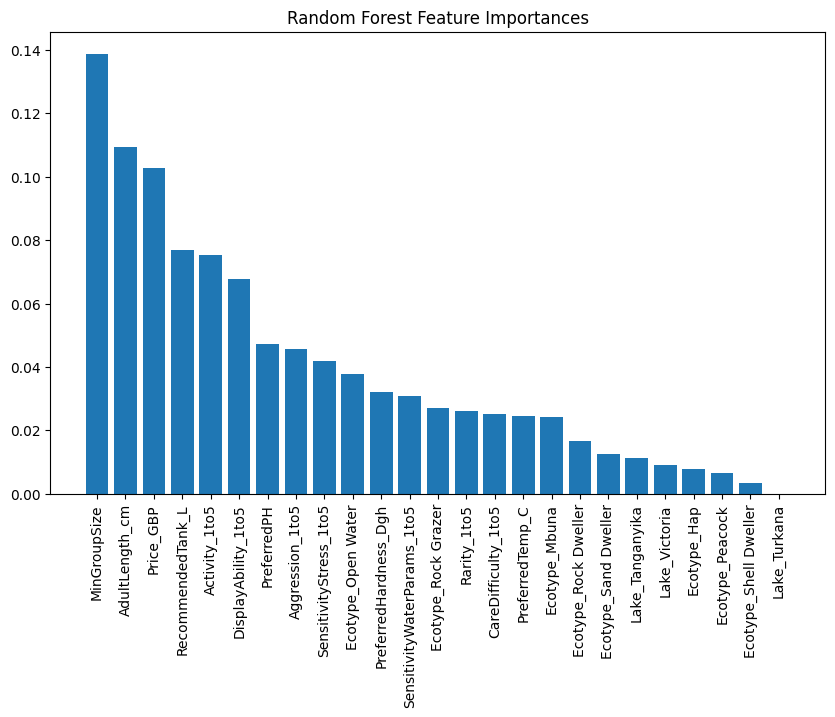

In [ ]:
# Get feature importances from the trained RF model
importances = rf.feature_importances_
feature_names = X.columns

# Sort by importance
indicies = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(len(importances)), importances[indicies], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indicies], rotation=90)
plt.show()

Part 4: KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Determine X (features) and  y (target)

In [ ]:
# From original df in order to keep categorical
y = df['Diet']

# Only X features encoded
X = df.drop(['Diet'], axis=1)
X_encoded = pd.get_dummies(X, drop_first=True)

Train Test and split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=73)

Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediction
y_pred_knn = knn.predict(X_test_scaled)

Evaluation

In [ ]:
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print('\nConfusion Matrix:\n'), confusion_matrix(y_test, y_pred_knn)
print('\nClassification Report:\n', classification_report(y_test, y_pred))

KNN Accuracy: 0.7

Confusion Matrix:


Classification Report:
               precision    recall  f1-score   support

   Carnivore       0.82      0.78      0.80        18
   Herbivore       0.00      0.00      0.00         3
    Omnivore       0.60      0.80      0.69        15
 Planktivore       0.67      0.67      0.67         3
 Scale Eater       0.00      0.00      0.00         1

    accuracy                           0.70        40
   macro avg       0.42      0.45      0.43        40
weighted avg       0.65      0.70      0.67        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The KNN model acheieved an accuracy of 70%. It performed well on predicting carnivores, but struggled with herbivores and some smaller classes due to limited training samples. This suggests that while KNN can capture local similarities, it is sensitive to imbalanced data. Increasing the dataset size or tuning hyperparameters for example: changing k, could improve performance.

**Conclusion**

---




  I first tried predicting the recommended tank size using 30 species. I noticed my MSE was high and my R² score was negative. The scatterplot showed that predictions were clustered along the middle instead of following the regression line, which suggested that the model didn’t have enough data (species) to learn meaningful patterns.

To improve performance, I added 170 more species. My R² increased, and the MSE decreased — a good sign that the model was learning better relationships. However, I later realized that predicting tank size wasn’t the best use of my data. I changed the target to Care Difficulty, which improved the model’s accuracy significantly.

I tested the model with and without including “Recommended Tank Size” as a feature and found that including it slightly improved accuracy. Overall, this experiment taught me the importance of feature selection, dataset size, and understanding the target variable before training.